# Análise de dados - Case TeleCom Churn

In [308]:
# Importando os pacotes que serão usados na análises
import pandas as pd
import matplotlib as mp
import numpy as np
import seaborn as sb

In [146]:
# Lendo o arquivo em csv, usando a função read_cdv do pacote pandas.
# Link da base de dados: https://drive.google.com/drive/folders/1fRdH8uh7k7XSYX5GbtjSqQIU3rQpVMHH?usp=sharing
dataset = pd.read_csv("C:/Users/Proco/Downloads/Telecom_churn.csv", sep=";", encoding='ISO-8859-1') 

In [147]:
# Trazendo as 5 primeiras linhas do conjunto de dados.
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [148]:
# Visualização de todos os dados no DataSet.
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [149]:
# Visualizar todas as colunas do dataset dentro de um vetor.
dataset.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [150]:
# Filtra a coluna Churn.
churn = dataset['Churn']

# Distribuição de clientes no dataset, que rescindiram ou não o contrato no último mês.  
churn.value_counts().sort_index()

# R: Temos 5174 clientes que não rescindiram com a empresa e 1869 que rescindiram 

No     5174
Yes    1869
Name: Churn, dtype: int64

In [151]:
# Declaração da Variável da Distribuição percentual: clientes que rescindiram x clientes que não rescindiram
dist_total_churn = churn.value_counts()

# Calculo da dist. em percentual
percent_churn = [100*x/dist_total_churn.sum() for x in dist_total_churn]

# Visualizar o percentual
percent_churn

# R: 26,5% da base de clientes no dataset rescindiu o contrato no último mês.

[73.46301292063042, 26.536987079369588]

In [187]:
# Declaração da qtd da distribuição dos clientes no dataset por gênero
gender_churn = ['gender','Churn']

# Declarar a Quant. de clientes que rescindiram o contrato no último mês por gênero
gender_clients = dataset.filter(items=gender_churn)

# Agrupamento da qtd de clientes que rescindiram por gênero
dis_gender_clients = gender_clients[gender_clients.Churn == 'Yes'].groupby('gender').count()

dis_gender_clients
# R: Esse percentual de 26,5% equivale a 1869 clientes, sendo 939 mulheres e 930 homens.

,Churn
gender,
Female,939
Male,930


In [190]:
# Declaração da variável da distribuição relação de gênero dos clientes
dist_total_gender = gender_clients.value_counts()

# Cálculo do percentual da distribuição de genêro 
percent_gender = [100*x/dist_total_gender.sum() for x in dist_total_gender]

# Visualizar a distribuição percentual dos gêneros
percent_gender

# R: 37,2% dos clientes que não rescindiram são mulheres e 36,2% são homens. Entre os clientes que rescindiram, 
#13,3 % são mulheres e 13,2% são homens.  

[37.27104926877751, 36.1919636518529, 13.332386767002697, 13.204600312366889]

In [380]:
#Info pessoal dos clientes que cancelaram contrato
personal_churn = ['Churn','Partner','Dependents']
serv_personal_churn = dataset.filter(items=personal_churn)

# Agregando colunas de acordo com a condição de Churn igual 'Yes'
dis_serv_personal = serv_personal_churn[serv_personal_churn == 'Yes'].groupby('Churn').count()
dis_serv_personal

# R: Entre o clientes que cancelaram, 699 tem cônjuge e 326 tem dependêntes.

,Partner,Dependents
Churn,,
Yes,669,326


In [383]:
#Info pessoal dos clientes que cancelaram contrato
senior_churn = ['Churn','SeniorCitizen']
serv_senior_churn = dataset.filter(items=senior_churn)

# Agregando colunas de acordo com a condição de Churn igual 'Yes'
dis_serv_senior_churn = serv_senior_churn[serv_senior_churn.Churn == 'Yes'].groupby('SeniorCitizen').count()
dis_serv_senior_churn

# R: Entre o clientes que cancelaram, 476 são idosos e 1393 não são.

,Churn
SeniorCitizen,
0,1393
1,476


<AxesSubplot:>

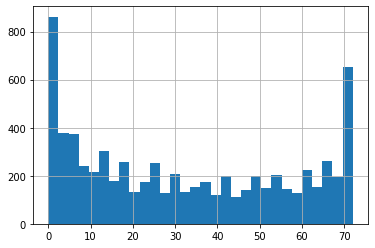

In [184]:
# Filtra a coluna Tenure.
num_meses_cliente_cia = dataset['tenure']

# Distribuição do tempo de permanência do cliente na Cia.
num_meses_cliente_cia.value_counts().sort_index()
num_meses_cliente_cia.hist(bins=30)

# A distribuição do tempo de permanência dos clientes mostra uma concentração no volume de dados nos dois extremos:
#  - Uma massa expressiva no volume de clientes possui um tempo de permanência menor do que 10 meses.
#  - A outra massa representa uma concentração de clientes, menor do que a citada anteriormente, com um tempo de 
# permanência acima de 65 meses

<AxesSubplot:title={'center':'Tempo de Contrato x Churn'}, xlabel='Contract'>

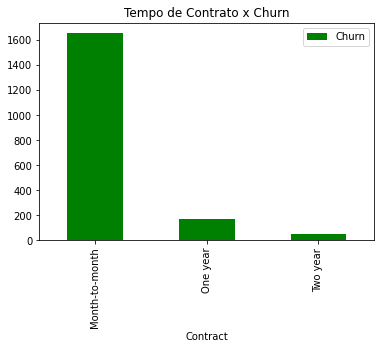

In [179]:
# Filtrar a Relação do gênero dos clientes
contract_clients = ['Contract','Churn']

# Declaração de variável do filtro das colunas gender e churn 
contract_churn = dataset.filter(items=contract_clients)

# Distribuição do Tempo de contrato dos clientes que rescindiram no último mês
dis_contract_churn = contract_churn[contract_churn.Churn == 'Yes'].groupby('Contract').count()
dis_contract_churn.plot.bar(color='green',title='Tempo de Contrato x Churn')

# O maior volume de rescisões está no clientes com tempo de contrato Month-to-Month

In [216]:
resume_info = ['Churn','MonthlyCharges','TotalCharges']
resume = dataset.filter(items=resume_info)
resume.groupby('Churn').describe()

# Respostas

# A média do valor da fatura mensal é 13,2 reais maior entre os clientes que rescindiram o contrato em comparação aos que não
#rescindiram. Esses clientes tem uma média do valor total pago 1018 reais menor justamente devido ao tempo de permanência como
# mostrado anteriormente.

# O Desvio padrão é maior no conjunto de dados dos clientes que não rescindiram no mês anterior, mostrando maior dispersão
# em comparação aos clientes que rescindiram. Ou seja, essa base é menos homogenea e uniforme.

# O valor mínimo da fatural mensal e no total pago é maior no conjunto de dados dos clientes que rescindiram o contrato no mês 
#anterior. Entretanto, o valor máximo de ambos  (fatura mensal e total pago) é maior no conjunto de dados dos clientes que não
#rescindiram.

# A mediana representada no segundo quartil (50%) da fatura mensal é maior no conjunto de dados que representa os clientes com
#Churn igual a "sim".

MonthlyCharges                                                    \
               count       mean        std    min    25%     50%   75%   
Churn                                                                    
No            5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4   
Yes           1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2   

              TotalCharges                                                    \
          max        count         mean          std    min    25%       50%   
Churn                                                                          
No     118.75       5174.0  2549.999497  2329.858843  18.80  572.9  1679.525   
Yes    118.35       1869.0  1531.796094  1890.822994  18.85  134.5   703.550   

                         
           75%      max  
Churn                    
No     4262.85  8672.45  
Yes    2331.30  8684.80

In [262]:
# Filtrar as colunas com os dados relacionados a telefonia
phone_churn = ['Churn','PhoneService','MultipleLines','DeviceProtection']
tel_phone_churn = dataset.filter(items=phone_churn)

# Agrupamento das colunas usando a partir da coluan 'Churn'
no_tel_phone_churn = tel_phone_churn[tel_phone_churn == 'No'].groupby('Churn').count()
yes_tel_phone_churn = tel_phone_churn[tel_phone_churn == 'Yes'].groupby('Churn').count()

In [263]:
# Dist. de serviços associados a telefonia dos clientes que rescindiram contrato 
yes_tel_phone_churn

# R: Entre os 1869 clientes que cancelaram o contrato no último mês, 1699 tinham serviço de telefone, 850 tinham multiplas linhas
#e 545 tinham Proteção para celular

,PhoneService,MultipleLines,DeviceProtection
Churn,,,
Yes,1699,850,545


In [264]:
# Dist. de serviços associados a telefonia dos clientes que não rescindiram contrato
no_tel_phone_churn

# Insight: Entre os clientes que não cancelaram no último mês: 512 não tem serviço de telefone, 2541 não tem múltiplas linhas
#e 1884 não tem Proteção para celular.

,PhoneService,MultipleLines,DeviceProtection
Churn,,,
No,512,2541,1884


In [281]:
# Filtrar as colunas com os dados relacionados a internet
internet_contract = ['Churn','InternetService','OnlineSecurity','OnlineBackup','TechSupport']
serv_internet_contract = dataset.filter(items=internet_contract)

# Agrupamento das colunas usando a partir da coluna 'Churn'
no_internet_contract = serv_internet_contract[serv_internet_contract == 'No'].groupby('Churn').count()
yes_internet_contract = serv_internet_contract[serv_internet_contract == 'Yes'].groupby('Churn').count()

In [282]:
# Dist. de serviços associados a internet dos clientes que rescindiram contrato
yes_internet_contract

# R: Entre os clientes que cancelaram: nenhum possuia o serviço de internet, mas 295 possuiam algum tipo de proteção online
#e 523 possuiam backup online. 310 clientes tinham suporte técnico.

,InternetService,OnlineSecurity,OnlineBackup,TechSupport
Churn,,,,
Yes,0,295,523,310


In [285]:
# Dist. de serviços associados a internet dos clientes que não rescindiram contrato
no_internet_contract

# R: Entre os clientes que não cancelaram: 1413 possui o serviço de internet, 2037 possuia algum tipo de proteção online
#e 1855 possui backup online. 2027 clientes não tem suporte técnico.

,InternetService,OnlineSecurity,OnlineBackup,TechSupport
Churn,,,,
No,1413,2037,1855,2027


In [273]:
# Filtrar as colunas com os dados relacionados a streaming
streaming_contract = ['Churn','StreamingTV','StreamingMovies']
serv_streaming_contract = dataset.filter(items=streaming_contract)

# Agrupamento das colunas usando a partir da coluna 'Churn'
no_streaming_contract = serv_streaming_contract[serv_streaming_contract == 'No'].groupby('Churn').count()
yes_streaming_contract = serv_streaming_contract[serv_streaming_contract == 'Yes'].groupby('Churn').count()

In [274]:
# Serviços associados a streaming dos clientes que rescindiram contrato
yes_streaming_contract

# R: Entre os clientes que cancelaram: 814 possuiam o StreamingTV e 818 eram clientes de algum serviço de streaming para filmes

,StreamingTV,StreamingMovies
Churn,,
Yes,814,818


In [276]:
# Serviços associados a streaming dos clientes que não rescindiram contrato
no_streaming_contract

# R: Entre os clientes que não cancelaram: 1868 possuem o StreamingTV e 1847 são clientes de algum serviço de streaming
#para filmes

,StreamingTV,StreamingMovies
Churn,,
No,1868,1847


In [360]:
#Método de pagamento dos clientes que cancelaram contrato
PaymentMethod_churn = ['Churn','PaymentMethod']
serv_PaymentMethod_churn = dataset.filter(items=PaymentMethod_churn)

# Agregando colunas de acordo com a condição de Churn igual 'Yes'
dis_PaymentMethod_churn = serv_PaymentMethod_churn[serv_PaymentMethod_churn.Churn == 'Yes'].groupby('PaymentMethod').count().sort_values(by='Churn', ascending=False)

#Visualizar tabela
dis_PaymentMethod_churn

# R: Dentre os clientes que tiveram cancelamento (1869), mais de 2/3 pagavam com o método de pagamento 'Electronic check'. 

,Churn
PaymentMethod,
Electronic check,1071
Mailed check,308
Bank transfer (automatic),258
Credit card (automatic),232
